The hypothesis to prove inbetween the variables:
x:
data[['average_wsitcon','average_wroleconflict','average_wintconflictd','average_wintconflictf',
'average_froleconf','average_fintconfd','average_fintconfd','average_burn','average_wtimepres',
'average_wnovel','average_wpeopresp',
'average_ftimepres','average_wrclar','average_cogflex','average_supsup',
'average_cowsup','average_parsup','average_famsup','average_wcowinsexphelp',
 'average_wallcowexp', 'average_roleover', 'average_wemotdem','average_faminstexp', 
 'average_famallexp', 'average_froleover','average_femotdem']]

y:
Work role adjustment (T1)







In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the CSV
file_path = "../preprocessed_data.csv"  
data = pd.read_csv(file_path)

# Step 2: Filter Columns
# Specifying the columns that I want to keep for ML modelaverage_fintconfd
filtered_data = data[
    ['average_wsitcon','average_wroleconflict','average_wintconflictd','average_wintconflictf',
     'average_froleconf','average_fintconfd','average_fintconff','average_burn','average_wtimepres','average_wnovel','average_wpeopresp',
      'average_ftimepres','average_wrclar','average_cogflex','average_supsup','average_cowsup',
      'average_parsup','average_famsup','average_wcowinsexphelp', 'average_wallcowexp', 'average_roleover',
        'average_wemotdem','average_faminstexp', 'average_famallexp', 'average_froleover','average_femotdem','average_workadj']]


In [2]:
filtered_data.head

<bound method NDFrame.head of      average_wsitcon  average_wroleconflict  average_wintconflictd  \
0               2.50               5.000000                   3.25   
1               4.25               4.333333                   1.50   
2               2.25               2.666667                   2.50   
3               1.75               3.333333                   1.75   
4               3.50               3.000000                   4.00   
..               ...                    ...                    ...   
574             3.50               4.666667                   3.25   
575             1.00               2.333333                   1.00   
576             1.25               1.000000                   1.50   
577             4.00               4.000000                   1.75   
578             2.75               2.666667                   3.00   

     average_wintconflictf  average_froleconf  average_fintconfd  \
0                 3.666667           4.000000               3

Correlation Matrix

In [3]:
correlation_matrix = filtered_data.corr(method='pearson')  
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                         average_wsitcon  average_wroleconflict  \
average_wsitcon                1.000000               0.685288   
average_wroleconflict          0.685288               1.000000   
average_wintconflictd          0.663943               0.690579   
average_wintconflictf          0.569855               0.619908   
average_froleconf              0.641966               0.715335   
average_fintconfd              0.636408               0.613419   
average_fintconff              0.562562               0.534877   
average_burn                   0.528883               0.566078   
average_wtimepres              0.713839               0.703730   
average_wnovel                 0.381626               0.397631   
average_wpeopresp              0.331769               0.317094   
average_ftimepres              0.654365               0.686462   
average_wrclar                 0.029371              -0.117515   
average_cogflex                0.426993               0

Correlation Matrix filtered to check the relation between each X and y

In [4]:

correlations = filtered_data.corr()["average_workadj"].sort_values(ascending=False)
# Display correlation of each feature with the target
print("Correlation of features with average_workadj  :")
print(correlations)

Correlation of features with average_workadj  :
average_workadj           1.000000
average_wrclar            0.473323
average_cowsup            0.417471
average_famallexp         0.366954
average_cogflex           0.363444
average_supsup            0.355718
average_famsup            0.354336
average_wallcowexp        0.353017
average_parsup            0.277093
average_wcowinsexphelp    0.250495
average_wpeopresp         0.218884
average_faminstexp        0.213700
average_wnovel            0.191779
average_femotdem          0.164685
average_wemotdem          0.125785
average_froleover         0.025902
average_fintconff         0.025744
average_fintconfd        -0.009261
average_froleconf        -0.051866
average_roleover         -0.069741
average_wintconflictd    -0.076038
average_burn             -0.076274
average_wsitcon          -0.094955
average_wintconflictf    -0.095540
average_wroleconflict    -0.098730
average_ftimepres        -0.103341
average_wtimepres        -0.171570
Name: a

The correlation values represent how closely related various features are to the variable workadj1, which likely measures work adjustment:

average_workadj (1.000): This is perfectly correlated with itself, as expected for any variable compared to itself.
average_wallcowexp (0.353): Positive correlation suggests that higher levels of all coworkers' experience are moderately associated with better work adjustment.
average_wcowinsexphelp (0.250): Positive correlation indicates that more coworkers’ instrumental experience in providing help is weakly linked to better work adjustment.
average_wemotdem (0.126): Slight positive correlation implies that higher emotional demands have a minimal positive association with work adjustment.
average_roleover (-0.070): Negative correlation indicates that higher role overload is weakly associated with poorer work adjustment.
In summary, the strongest positive association is with coworkers' experience, while role overload is the only factor negatively associated with work adjustment.

ML modeling

In [5]:
# Features and target
X = filtered_data.drop(columns=['average_workadj'])
y = filtered_data['average_workadj']


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.19


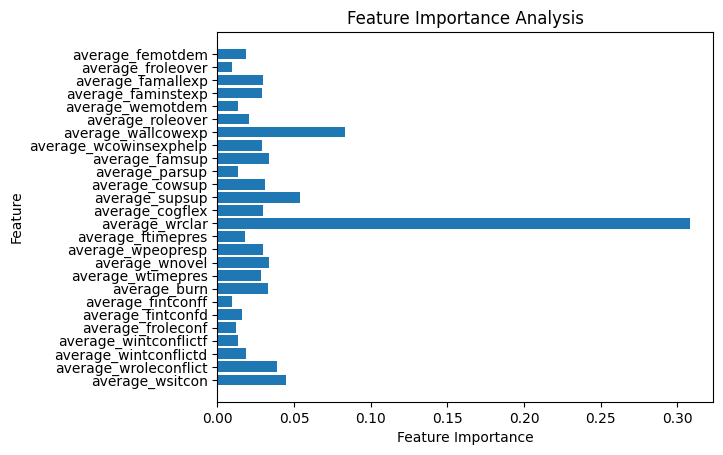

In [7]:
import matplotlib.pyplot as plt

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()


In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and MSE
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"Tuned Mean Squared Error: {mse_tuned:.2f}")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Mean Squared Error: 0.19


No updae


In [9]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42, min_samples_leaf=2, min_samples_split=5,n_estimators=200)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.19


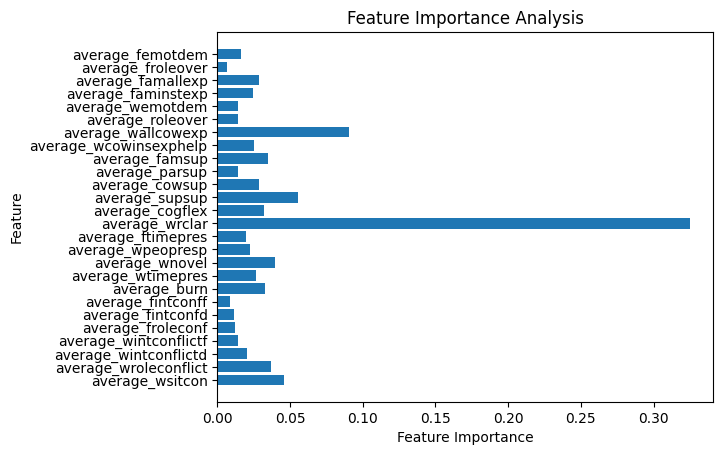

In [10]:

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()

Cross-Validation
Use cross-validation to ensure the model performs consistently across different subsets of the data.

In [11]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-Validated Mean Squared Error: {cv_mse:.2f}")


Cross-Validated Mean Squared Error: 0.24


 Check for Overfitting
Compare training and testing errors. If the training error is much lower, your model might be overfitting

In [12]:
# Training error
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error: {mse_train:.2f}")


Training Mean Squared Error: 0.06


In [13]:
import pandas as pd
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importances)


                   Feature  Importance
12          average_wrclar    0.324894
19      average_wallcowexp    0.090765
14          average_supsup    0.055181
0          average_wsitcon    0.045854
9           average_wnovel    0.039305
1    average_wroleconflict    0.037166
17          average_famsup    0.034605
7             average_burn    0.032637
13         average_cogflex    0.031765
15          average_cowsup    0.028924
23       average_famallexp    0.028762
8        average_wtimepres    0.026849
18  average_wcowinsexphelp    0.024855
22      average_faminstexp    0.024766
10       average_wpeopresp    0.022607
2    average_wintconflictd    0.020633
11       average_ftimepres    0.019448
25        average_femotdem    0.015887
3    average_wintconflictf    0.014218
21        average_wemotdem    0.014134
16          average_parsup    0.014111
20        average_roleover    0.013923
4        average_froleconf    0.012186
5        average_fintconfd    0.011338
6        average_fintconf

Global Correlation Insights

While Random Forests are non-linear models, you can compute Pearson correlation coefficients between each feature and the target (workadj1) to check for linear relationships.

In [14]:
correlations = X.join(y).corr()['average_workadj']
print(correlations.sort_values(ascending=False))


average_workadj           1.000000
average_wrclar            0.473323
average_cowsup            0.417471
average_famallexp         0.366954
average_cogflex           0.363444
average_supsup            0.355718
average_famsup            0.354336
average_wallcowexp        0.353017
average_parsup            0.277093
average_wcowinsexphelp    0.250495
average_wpeopresp         0.218884
average_faminstexp        0.213700
average_wnovel            0.191779
average_femotdem          0.164685
average_wemotdem          0.125785
average_froleover         0.025902
average_fintconff         0.025744
average_fintconfd        -0.009261
average_froleconf        -0.051866
average_roleover         -0.069741
average_wintconflictd    -0.076038
average_burn             -0.076274
average_wsitcon          -0.094955
average_wintconflictf    -0.095540
average_wroleconflict    -0.098730
average_ftimepres        -0.103341
average_wtimepres        -0.171570
Name: average_workadj, dtype: float64


In [15]:
!pip install shap



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Users\reema\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


 SHAP Values (SHapley Additive exPlanations)
SHAP values explain the output of a machine learning model by assigning each feature an importance value for each prediction. It provides a global view of feature impact as well as local explanations for individual predictions.

C:\Users\reema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


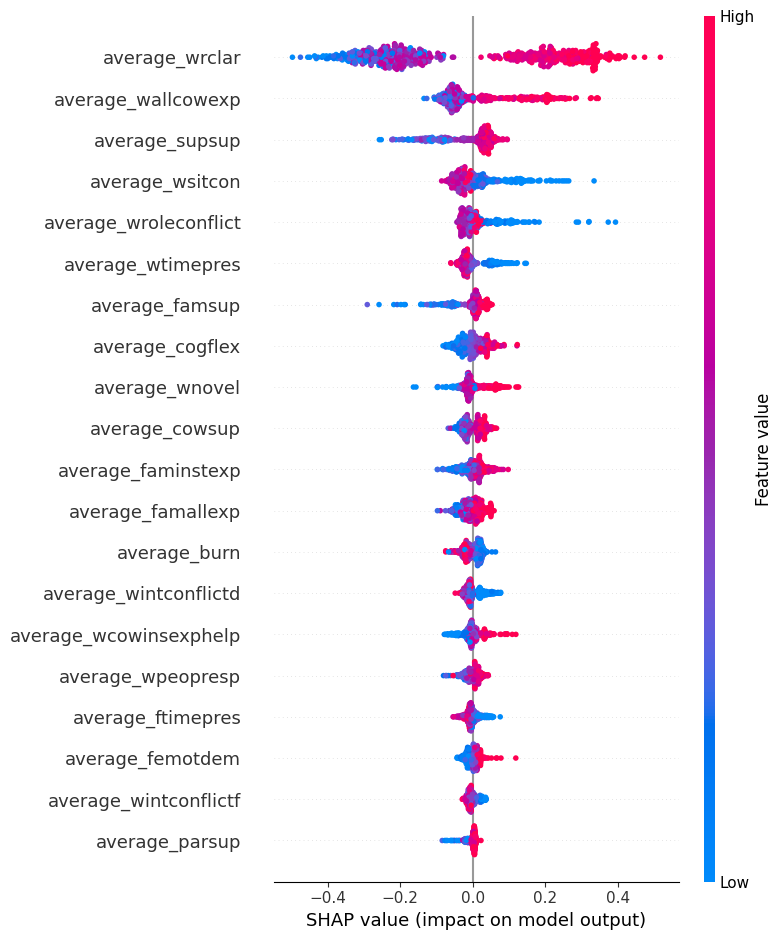

In [16]:
import shap

# Explain the model's predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Visualize global feature importance
shap.summary_plot(shap_values, X)


<!-- The SHAP (SHapley Additive exPlanations) summary plot shows the impact of four features on the model's output, with each point representing a data instance. Here’s a breakdown:

average_wallcowexp:

Higher values (pink) positively impact the model output, while lower values (blue) negatively impact it.
This feature has the strongest positive influence on the output.
average_roleover:

Higher values (pink) generally push the model output toward the negative side.
It has a negative impact on the model output, especially for higher values.
average_wcowinsexphelp:

Higher values (pink) show a slight positive influence, while lower values (blue) tend to push the output negatively.
The effect is relatively small but positive.
average_wemotdem:

Both low and high values have minimal impact on the output, centered around zero.
It is the least impactful feature among the four.
Summary:
Key Influencer: average_wallcowexp has the most significant positive impact.
Negative Impact: average_roleover reduces the model output.
Lesser Impact: average_wcowinsexphelp and average_wemotdem have smaller, mixed influences. -->


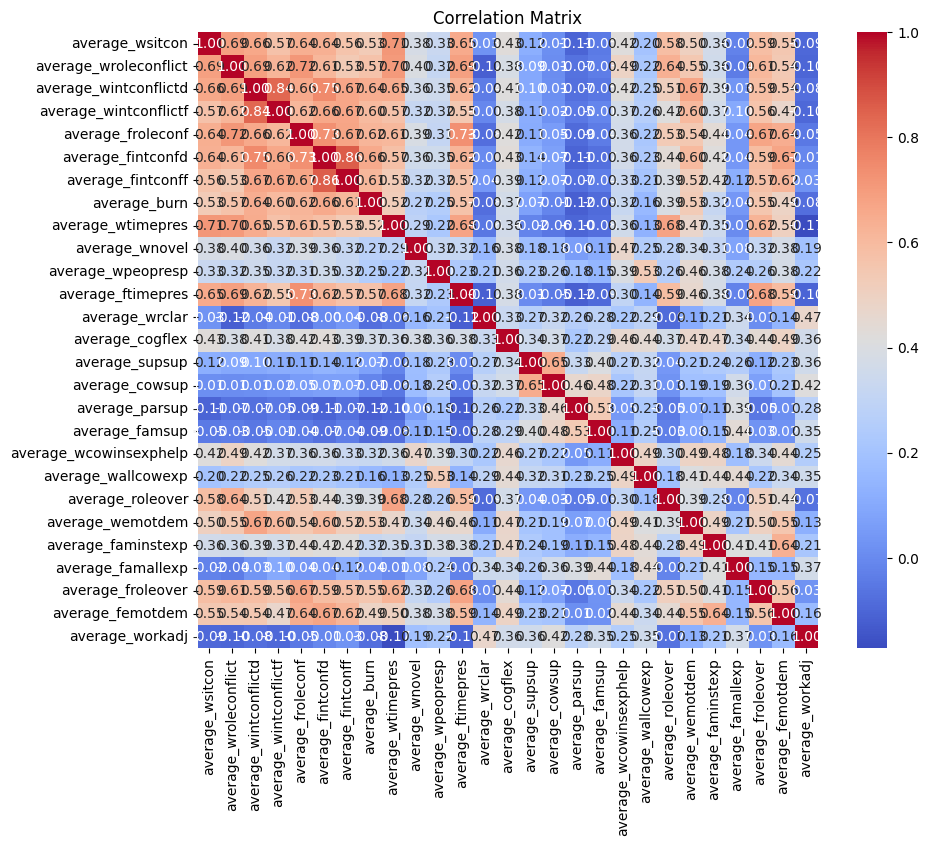

In [17]:
import seaborn as sns

# Compute correlation matrix
corr = X.join(y).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


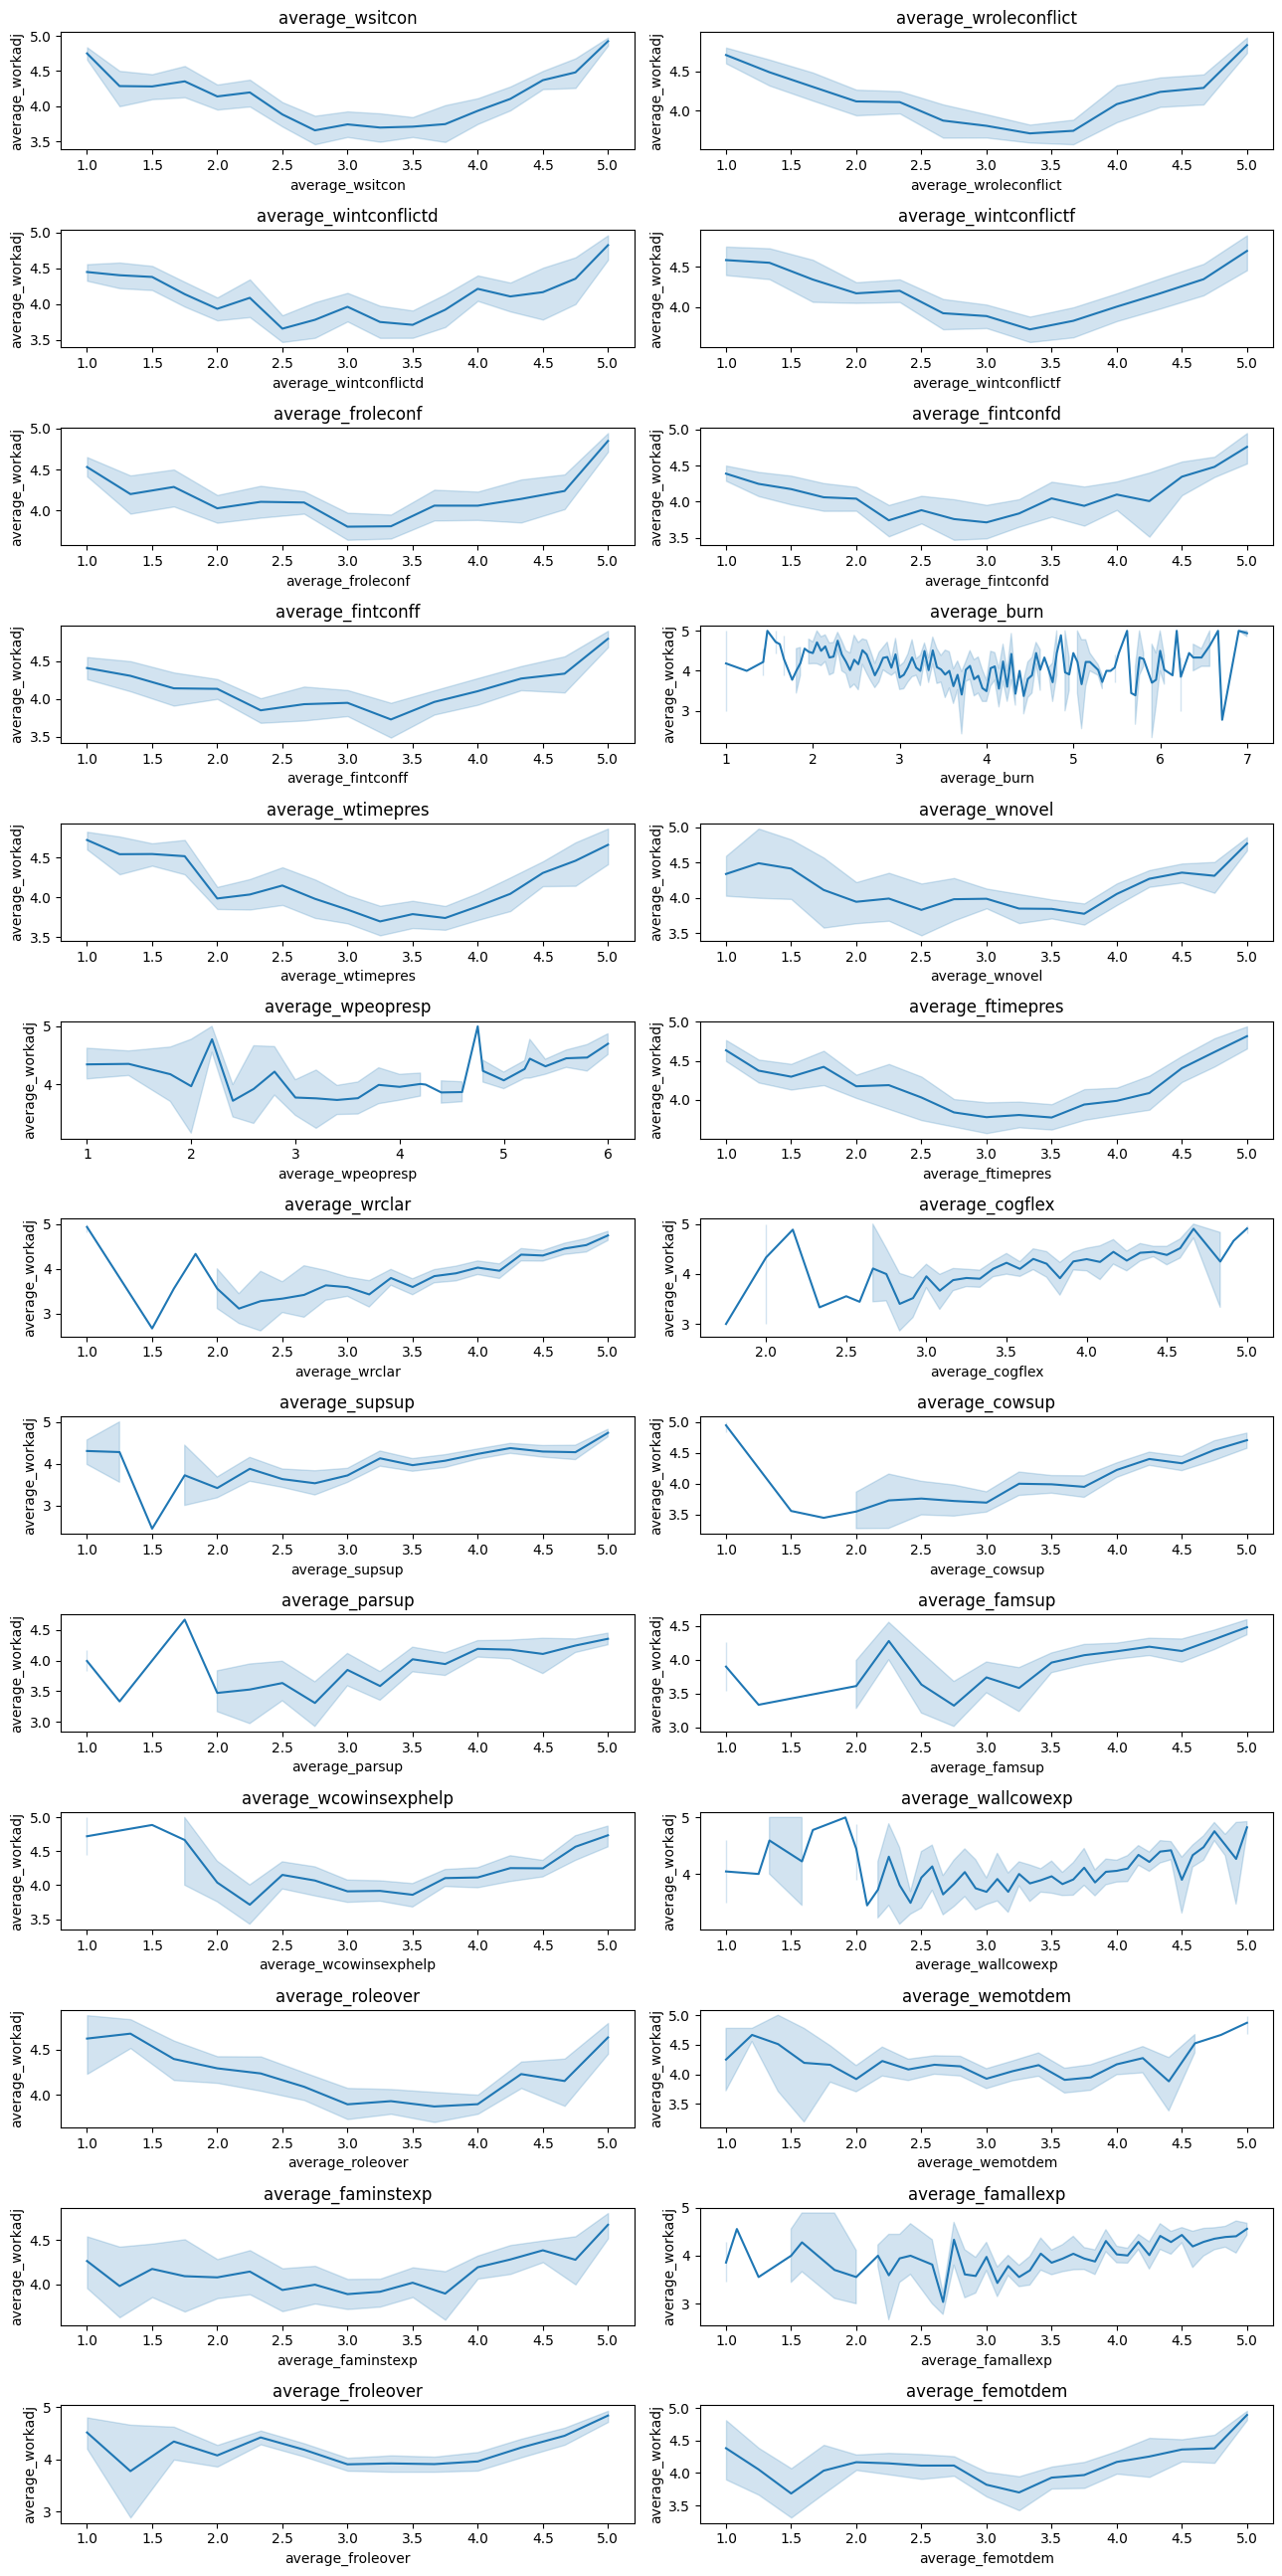

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots (2 rows, 2 columns)
import matplotlib.pyplot as plt
import seaborn as sns
import math

# List of features to plot
features = ['average_wsitcon','average_wroleconflict','average_wintconflictd','average_wintconflictf','average_froleconf','average_fintconfd','average_fintconff','average_burn','average_wtimepres','average_wnovel','average_wpeopresp',
      'average_ftimepres','average_wrclar','average_cogflex','average_supsup','average_cowsup',
      'average_parsup','average_famsup','average_wcowinsexphelp', 'average_wallcowexp', 'average_roleover',
        'average_wemotdem','average_faminstexp', 'average_famallexp', 'average_froleover','average_femotdem']

# Set the number of columns and calculate rows dynamically
columns = 2
rows = math.ceil(len(features) / columns)

# Create the subplots
fig, axs = plt.subplots(rows, columns, figsize=(13, rows * 2))

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through the features and plot each one
for i, feature in enumerate(features):
    sns.lineplot(x=X[feature], y=y, ax=axs[i])
    axs[i].set_title(f"{feature}")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("average_workadj")

# Hide unused axes
for i in range(len(features), len(axs)):
    axs[i].set_visible(False)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
#average_fintconfd couldnt be plotted


'average_wsitcon',
'average_wroleconflict',
'average_wintconflictd'
,'average_wintconflictf'
,'average_froleconf',
'average_burn',
'average_wtimepres',
'average_wnovel',
'average_wpeopresp',
      'average_ftimepres'
      ,'average_wrclar',
      'average_cogflex',
      'average_supsup',
      'average_cowsup',
      'average_parsup',
      'average_famsup',
      'average_wcowinsexphelp', 
      'average_wallcowexp',
       'average_roleover',
        'average_wemotdem',
        'average_faminstexp',
         'average_famallexp',
          'average_froleover',
          'average_femotdem

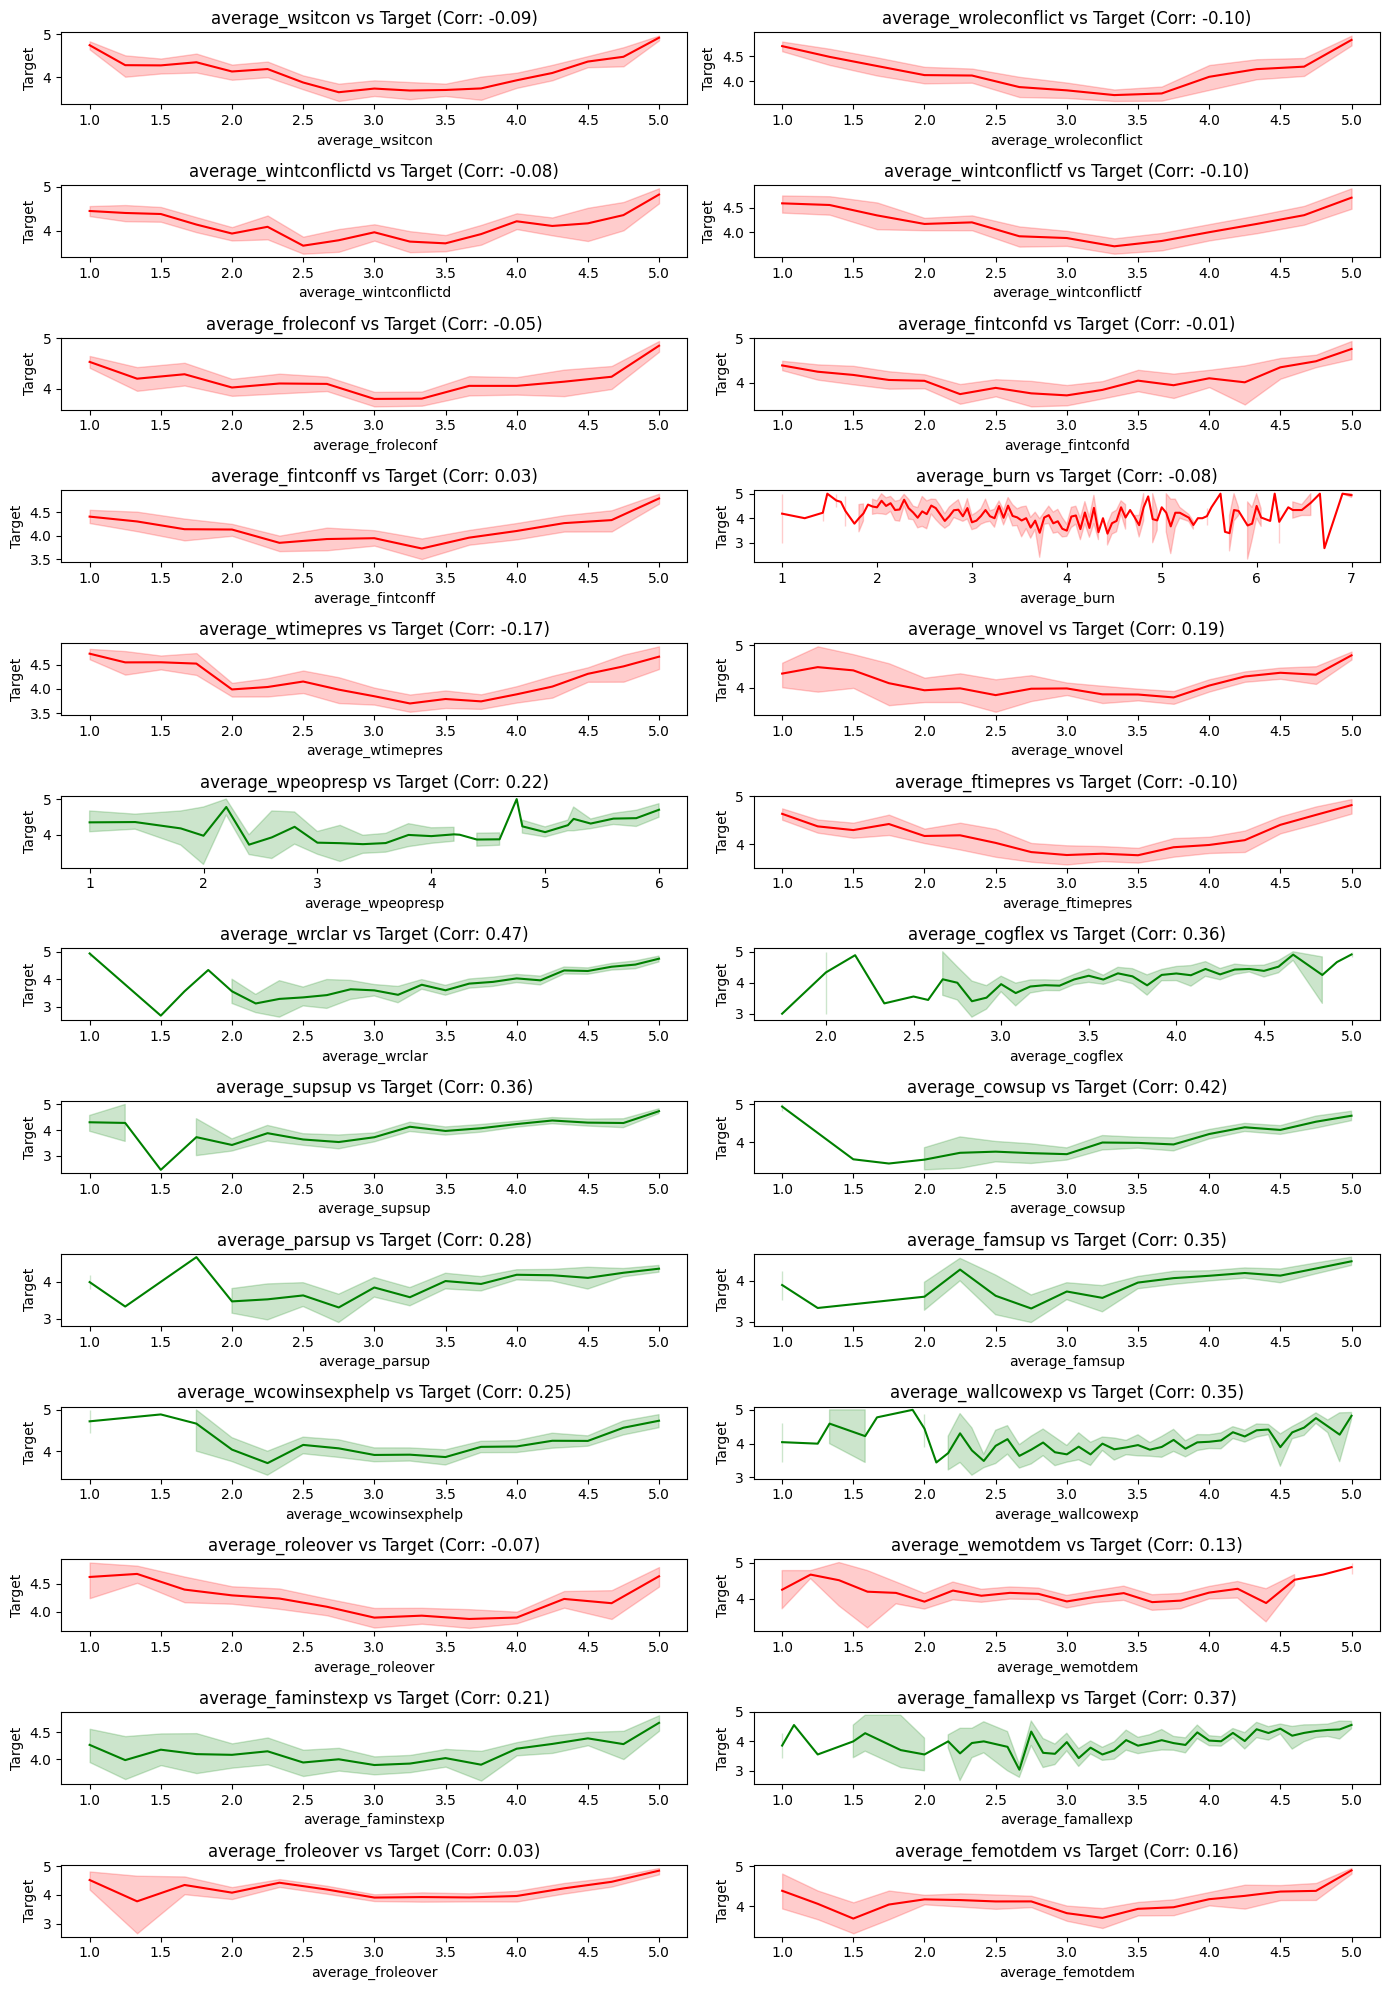

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the correlation between each feature and the target
correlations = X.corrwith(y)

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(13, 2, figsize=(14, 20))

# List of features to plot
features = ['average_wsitcon','average_wroleconflict','average_wintconflictd','average_wintconflictf','average_froleconf','average_fintconfd','average_fintconff','average_burn','average_wtimepres','average_wnovel','average_wpeopresp',
      'average_ftimepres','average_wrclar','average_cogflex','average_supsup','average_cowsup',
      'average_parsup','average_famsup','average_wcowinsexphelp', 'average_wallcowexp', 'average_roleover',
        'average_wemotdem','average_faminstexp', 'average_famallexp', 'average_froleover','average_femotdem']
# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through the features and plot each one in a subplot
for i, feature in enumerate(features):
    # Get the correlation for the current feature
    corr = correlations[feature]
    
    # Set the color based on the correlation
    if corr > 0.2:
        color = 'green'  # Positive correlation
    elif corr < 0.2:
        color = 'red'    # Negative correlation
    else:
        color = 'blue'   # No correlation or neutral
    
    # Create a line plot
    sns.lineplot(x=X[feature], y=y, ax=axs[i], color=color)
    axs[i].set_title(f"{feature} vs Target (Corr: {corr:.2f})")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Target")

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Show the plots
plt.show()


with 0 as threshold

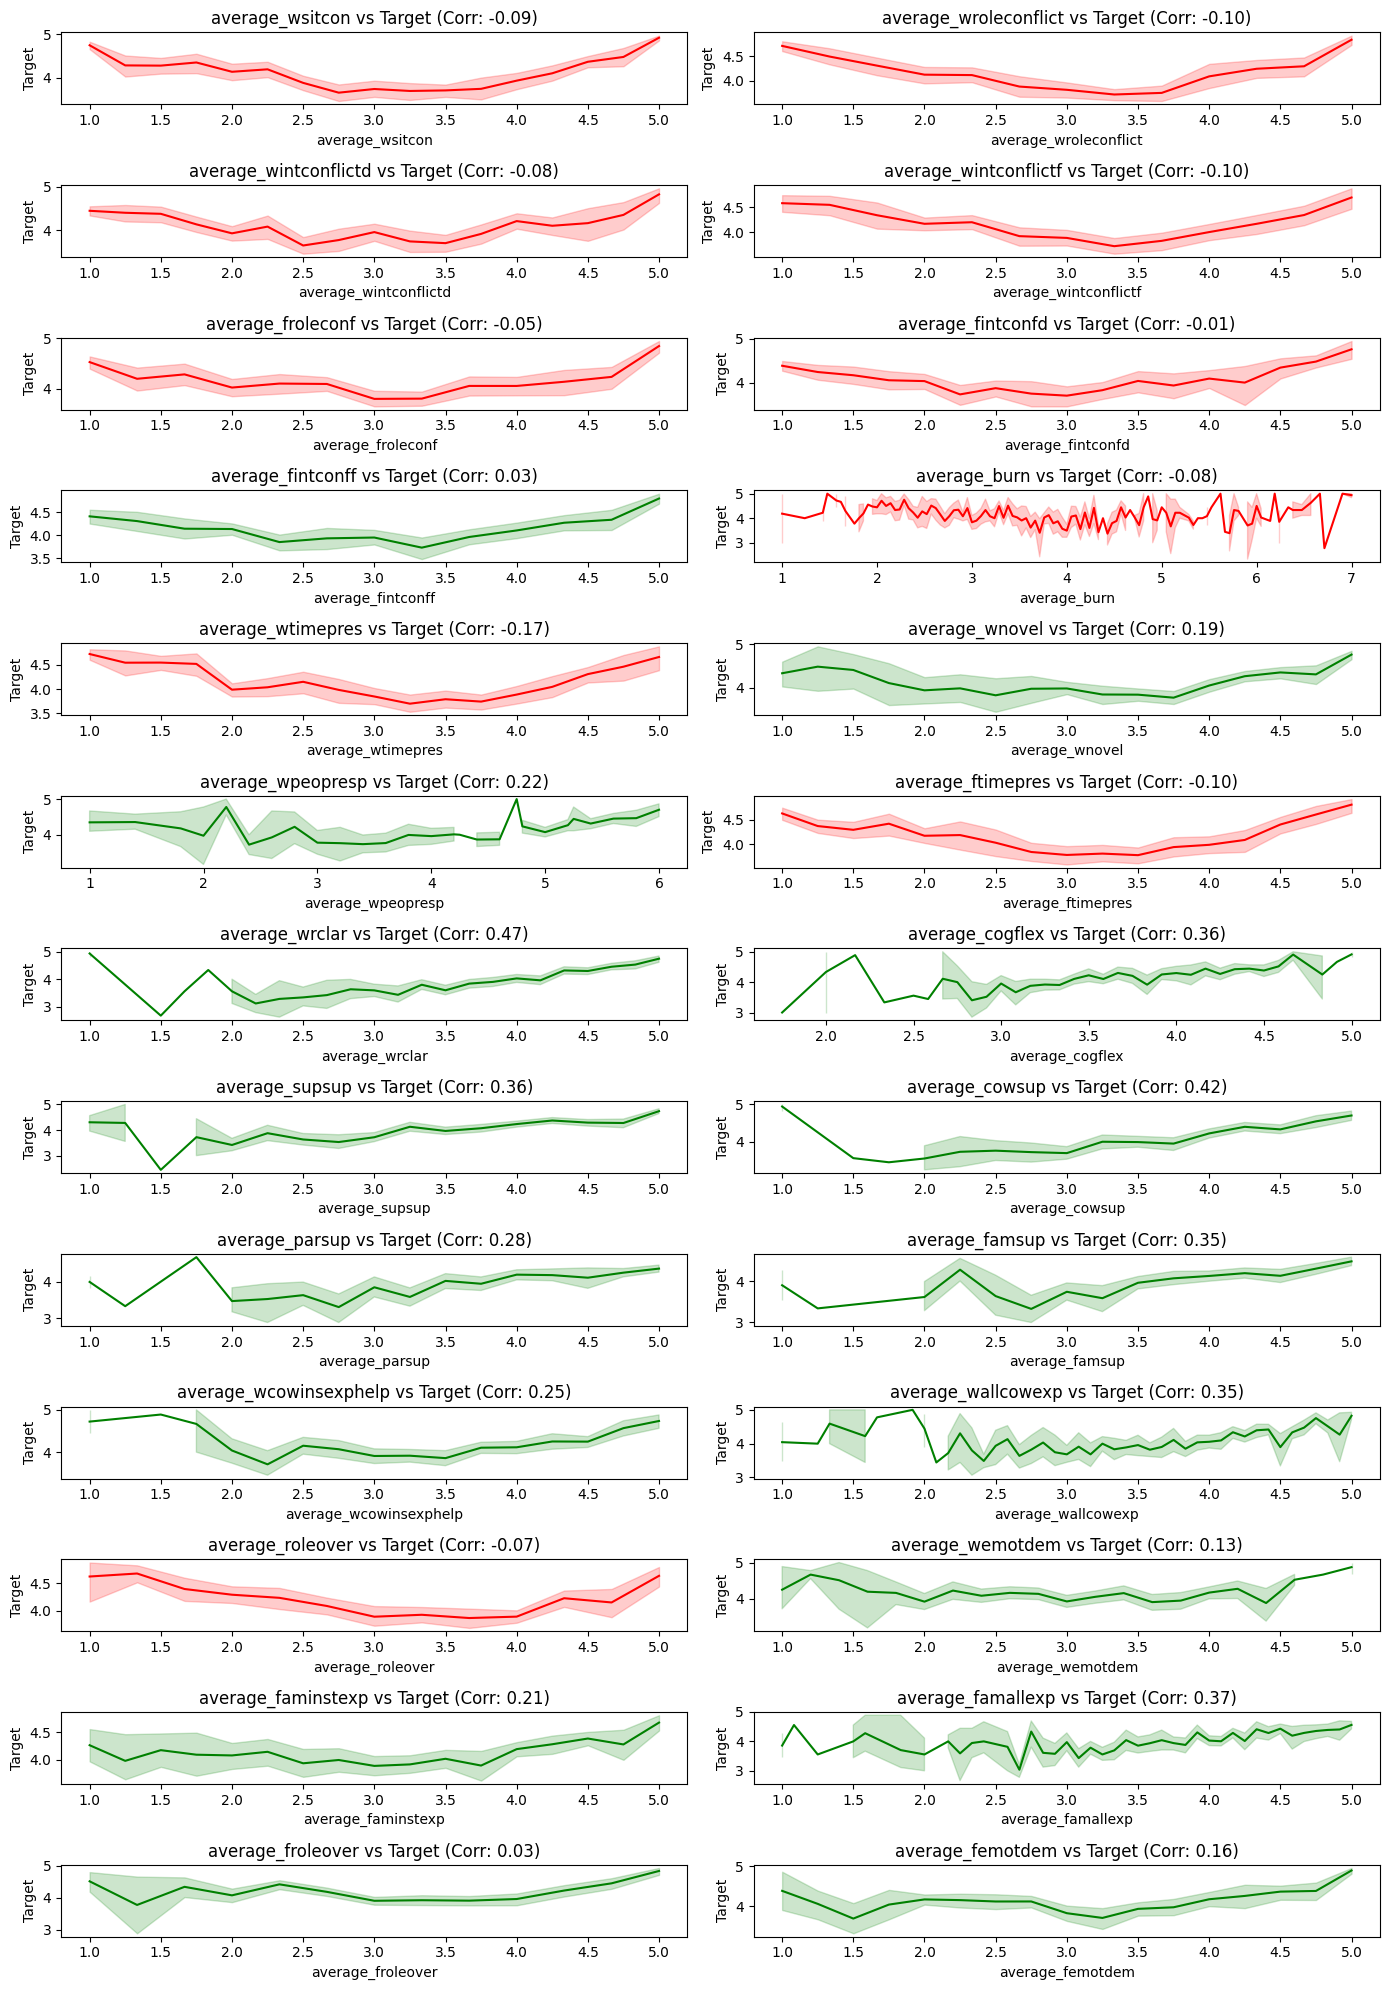

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the correlation between each feature and the target
correlations = X.corrwith(y)

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(13, 2, figsize=(14, 20))

# List of features to plot
features = ['average_wsitcon', 'average_wroleconflict', 'average_wintconflictd', 'average_wintconflictf',
             
            'average_froleconf','average_fintconfd','average_fintconff' ,'average_burn', 'average_wtimepres', 'average_wnovel', 
            'average_wpeopresp', 'average_ftimepres', 'average_wrclar', 'average_cogflex', 'average_supsup', 
            'average_cowsup', 'average_parsup', 'average_famsup', 'average_wcowinsexphelp', 'average_wallcowexp',
            'average_roleover', 'average_wemotdem', 'average_faminstexp', 'average_famallexp', 'average_froleover', 
            'average_femotdem']
# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through the features and plot each one in a subplot
for i, feature in enumerate(features):
    # Get the correlation for the current feature
    corr = correlations[feature]
    
    # Set the color based on the correlation
    if corr > 0:
        color = 'green'  # Positive correlation
    elif corr < 0:
        color = 'red'    # Negative correlation
    else:
        color = 'blue'   # No correlation or neutral
    
    # Create a line plot
    sns.lineplot(x=X[feature], y=y, ax=axs[i], color=color)
    axs[i].set_title(f"{feature} vs Target (Corr: {corr:.2f})")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Target")

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Show the plots
plt.show()


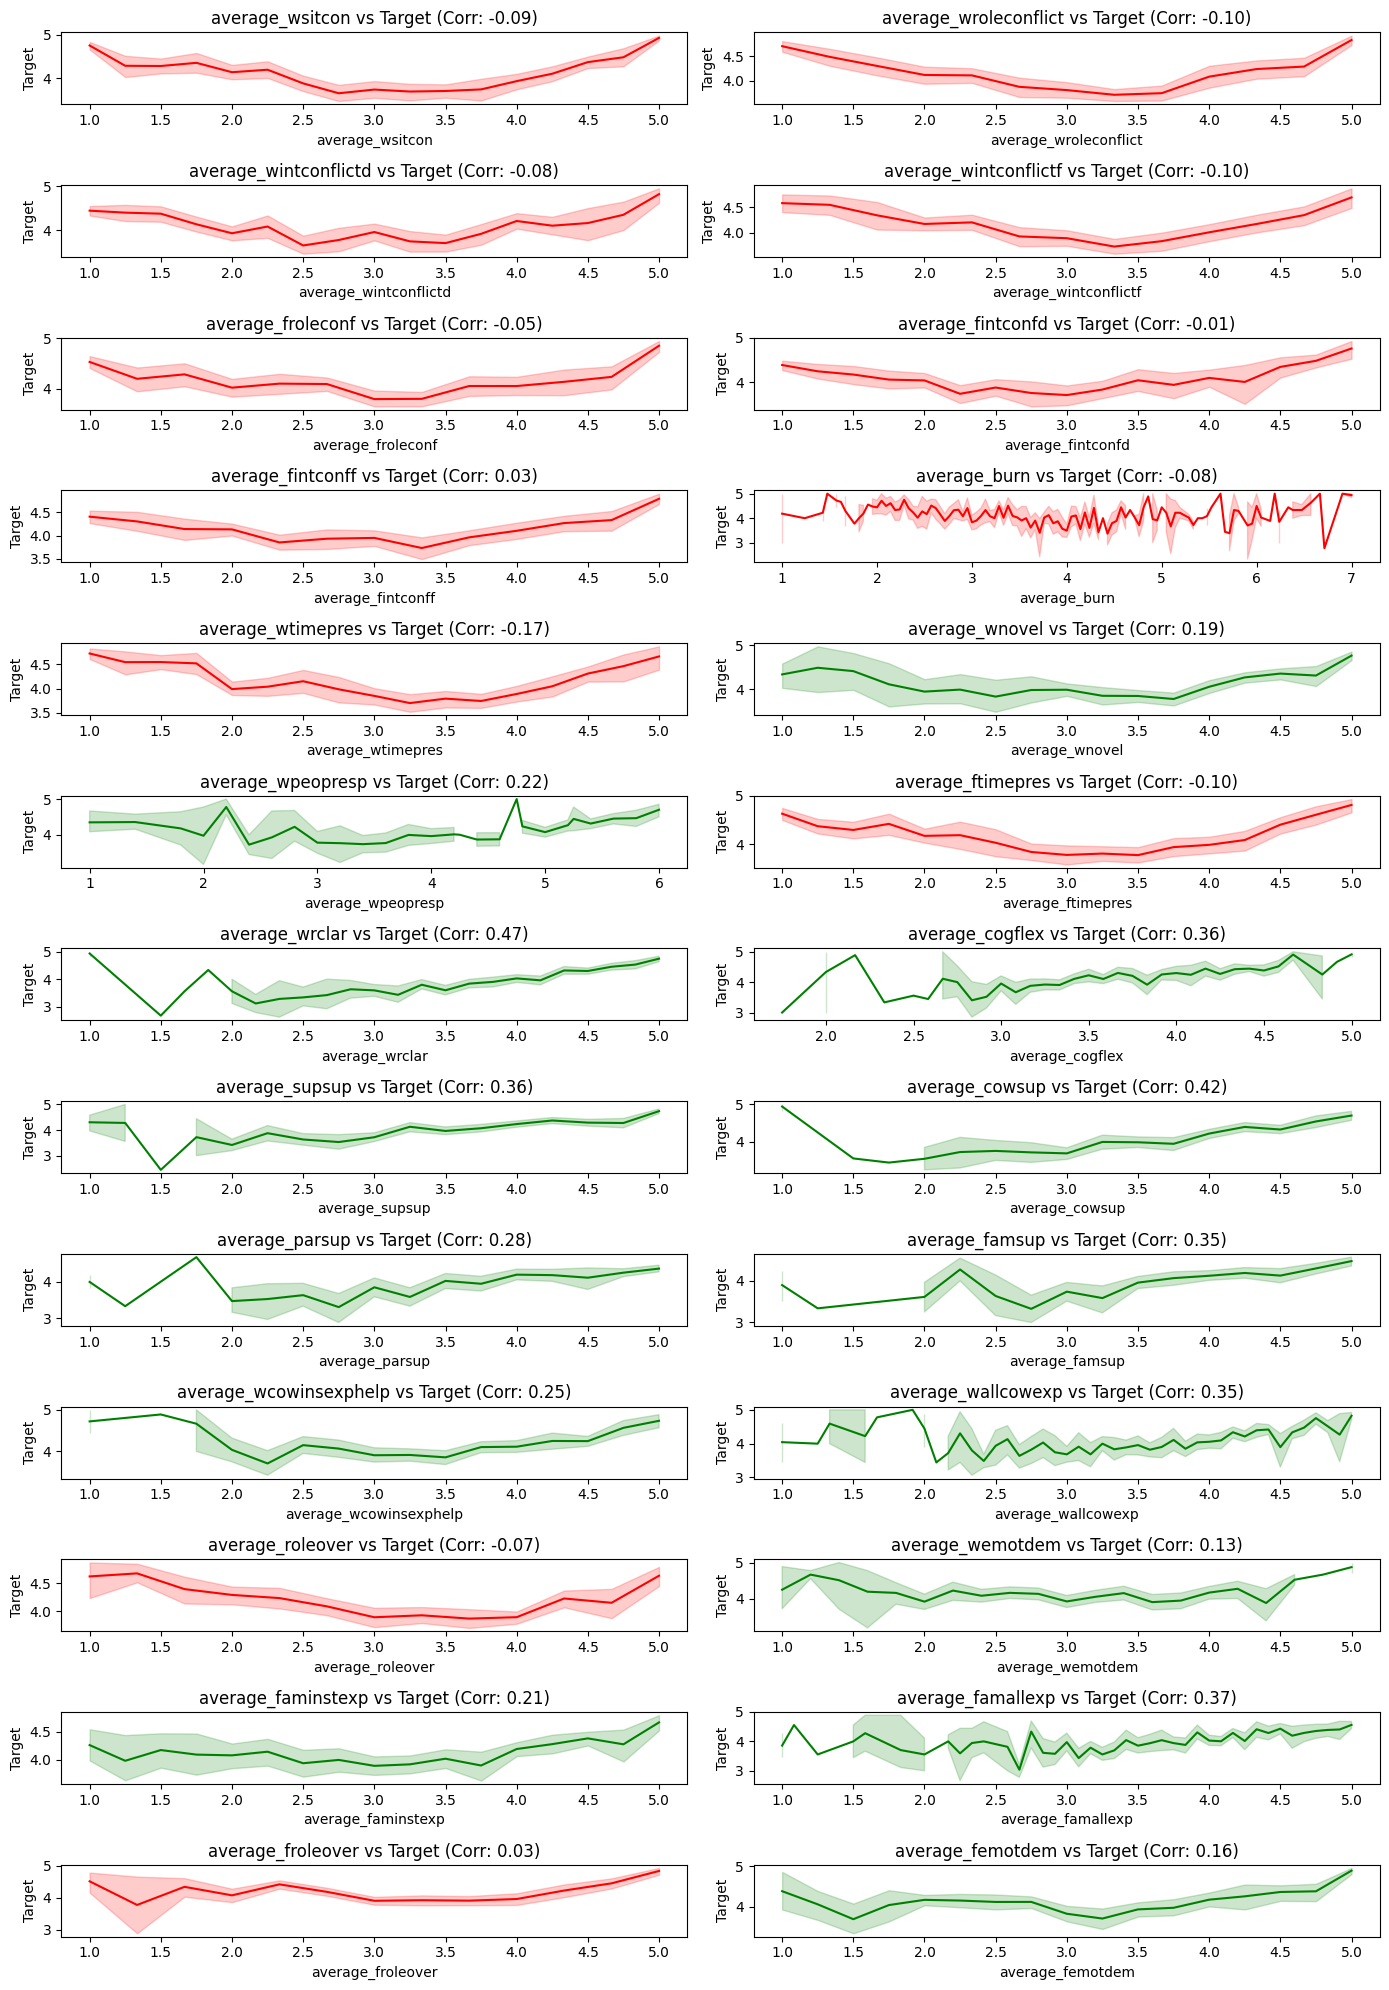

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the correlation between each feature and the target
correlations = X.corrwith(y)

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(13, 2, figsize=(14, 20))

# List of features to plot
features = ['average_wsitcon', 'average_wroleconflict', 'average_wintconflictd', 'average_wintconflictf',
             
            'average_froleconf' ,'average_fintconfd','average_fintconff','average_burn', 'average_wtimepres', 'average_wnovel', 
            'average_wpeopresp', 'average_ftimepres', 'average_wrclar', 'average_cogflex', 'average_supsup', 
            'average_cowsup', 'average_parsup', 'average_famsup', 'average_wcowinsexphelp', 'average_wallcowexp',
            'average_roleover', 'average_wemotdem', 'average_faminstexp', 'average_famallexp', 'average_froleover', 
            'average_femotdem']
# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through the features and plot each one in a subplot
for i, feature in enumerate(features):
    # Get the correlation for the current feature
    corr = correlations[feature]
    
    # Set the color based on the correlation
    if corr > 0.1:
        color = 'green'  # Positive correlation
    elif corr < 0.1:
        color = 'red'    # Negative correlation
    else:
        color = 'blue'   # No correlation or neutral
    
    # Create a line plot
    sns.lineplot(x=X[feature], y=y, ax=axs[i], color=color)
    axs[i].set_title(f"{feature} vs Target (Corr: {corr:.2f})")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Target")

# Adjust the layout so that plots do not overlap
plt.tight_layout()

# Show the plots
plt.show()
